In [47]:
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split



In [48]:
file_path=os.path.join(os.getcwd(),"dataset","train.csv")

df = pd.read_csv(file_path)

In [49]:
df.head()

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,06/07/15,06/03/15,"New Michelle, OH 50777",-283.29
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,03/06/17,03/05/17,"New Michaelport, WY 12072",-159.96
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,03/09/15,03/08/15,"Bowmanshire, WA 19241",-154.29
3,fffe350031003300,Robert Chaires,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,No,No,NaN,No,Wealthy,Yes,05/24/15,05/20/15,"East Robyn, KY 86375",-161.16
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793",-159.23


Duplicates

In [50]:
def remove_duplicates(df):
    """
    Remove duplicates from a DataFrame.

    Parameters:
    - df: pandas DataFrame

    Returns:
    - DataFrame with duplicates removed
    """
    # Print the shape before removing duplicates
    print("Shape before removing duplicates:", df.shape)

    # Remove duplicates
    df_no_duplicates = df.drop_duplicates()

    # Print the shape after removing duplicates
    print("Shape after removing duplicates:", df_no_duplicates.shape)

    return df_no_duplicates


df=remove_duplicates(df=df)

Shape before removing duplicates: (6500, 20)
Shape after removing duplicates: (6500, 20)


## Data Overview

In [51]:
df.describe

<bound method NDFrame.describe of                Customer Id          Artist Name  Artist Reputation  Height  \
0     fffe3900350033003300        Billy Jenkins               0.26    17.0   
1     fffe3800330031003900          Jean Bryant               0.28     3.0   
2     fffe3600370035003100         Laura Miller               0.07     8.0   
3         fffe350031003300       Robert Chaires               0.12     9.0   
4     fffe3900320038003400         Rosalyn Krol               0.15    17.0   
...                    ...                  ...                ...     ...   
6495  fffe3800370037003300  Jeffrey Freudenthal               0.37    37.0   
6496      fffe310036003400        Larry Edwards               0.67    15.0   
6497  fffe3600300031003300         Denise Worth               0.68    19.0   
6498  fffe3600350035003900          Daniel Drew               0.02    33.0   
6499  fffe3700310031003600       Vernon Carroll               0.18    30.0   

      Width     Weight   Mate

In [52]:
df.shape

(6500, 20)

Columns Lables

In [53]:
# Replace spaces with underscores in column labels
df.rename(columns=lambda x: x.replace(" ", "_"), inplace=True)

In [54]:
df.columns

Index(['Customer_Id', 'Artist_Name', 'Artist_Reputation', 'Height', 'Width',
       'Weight', 'Material', 'Price_Of_Sculpture', 'Base_Shipping_Price',
       'International', 'Express_Shipment', 'Installation_Included',
       'Transport', 'Fragile', 'Customer_Information', 'Remote_Location',
       'Scheduled_Date', 'Delivery_Date', 'Customer_Location', 'Cost'],
      dtype='object')

Unique Value percentage

Check Na values

Columns with Percentage of Missing Values:
Height: 5.20%
Width: 8.25%
Weight: 8.30%
Transport: 6.22%
Remote_Location: 11.09%


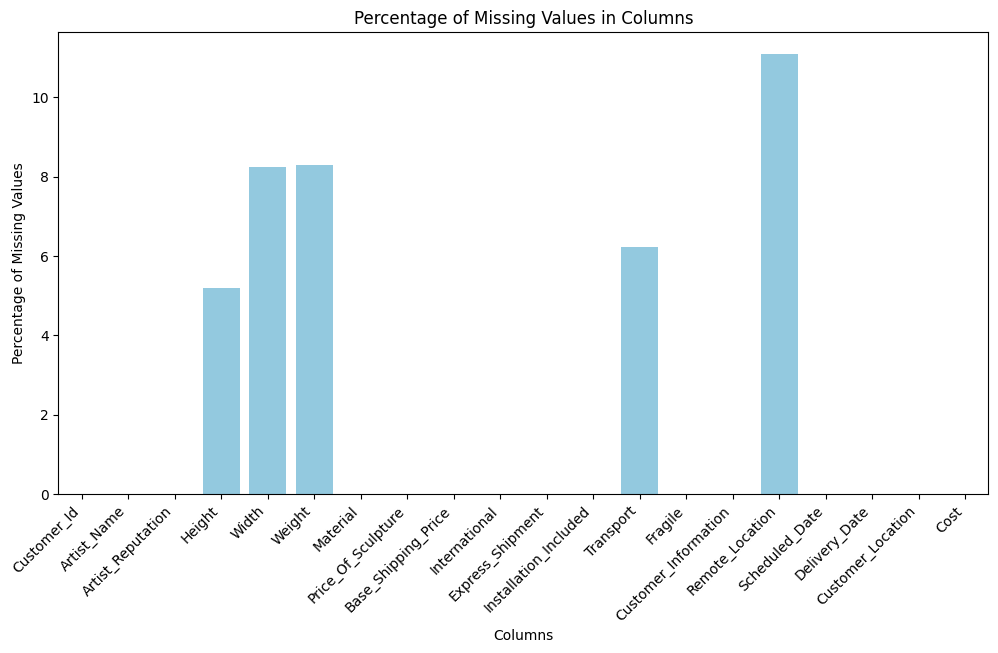

In [80]:
def plot_missing_values(df):
    """
    Plot missing values in the columns of a DataFrame and print columns with their percentage of missing values.

    Parameters:
    - df: pandas DataFrame

    Returns:
    - None (displays the plot)
    """
    # Calculate the percentage of missing values in each column
    missing_percentage = (df.isnull().sum() / len(df)) * 100

    # Print columns with their percentage of missing values
    print("Columns with Percentage of Missing Values:")
    for col, percentage in missing_percentage.items():
        if percentage != 0 :
            print(f"{col}: {percentage:.2f}%")

    # Create a bar plot
    plt.figure(figsize=(12, 6))
    sns.barplot(x=missing_percentage.index, y=missing_percentage.values, color='skyblue')
    plt.title('Percentage of Missing Values in Columns')
    plt.xlabel('Columns')
    plt.ylabel('Percentage of Missing Values')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()

    
    
plot_missing_values(df=df_imputed)

Dropping rows with NO Material data as Available

In [56]:
# Drop rows with NaN values in the specified column
# Print the shape of the DataFrame before dropping rows with NaN values
print(f"Shape before dropping NaN values: {df.shape}")

# Drop rows with NaN values in the specified column
df = df.dropna(subset=["Material"])

# Print the shape of the DataFrame after dropping rows with NaN values
print(f"Shape after dropping NaN values: {df.shape}")

# Display the DataFrame after dropping rows with NaN values
print("\nDataFrame after dropping NaN values:")



Shape before dropping NaN values: (6500, 20)
Shape after dropping NaN values: (5736, 20)

DataFrame after dropping NaN values:


Filling Nan Values

In [57]:
df[["Artist_Reputation","Height","Width","Weight","Material","Transport","Remote_Location"]]

,Artist_Reputation,Height,Width,Weight,Material,Transport,Remote_Location
0,0.26,17.0,6.0,4128.0,Brass,Airways,No
1,0.28,3.0,3.0,61.0,Brass,Roadways,No
2,0.07,8.0,5.0,237.0,Clay,Roadways,Yes
3,0.12,9.0,NaN,NaN,Aluminium,NaN,Yes
4,0.15,17.0,6.0,324.0,Aluminium,Airways,No
...,...,...,...,...,...,...,...
6494,0.45,NaN,28.0,10851.0,Aluminium,Roadways,No
6495,0.37,37.0,10.0,16551.0,Brass,Airways,Yes
6497,0.68,19.0,8.0,587.0,Clay,NaN,No
6498,0.02,33.0,9.0,1269377.0,Stone,Roadways,Yes


Transport 

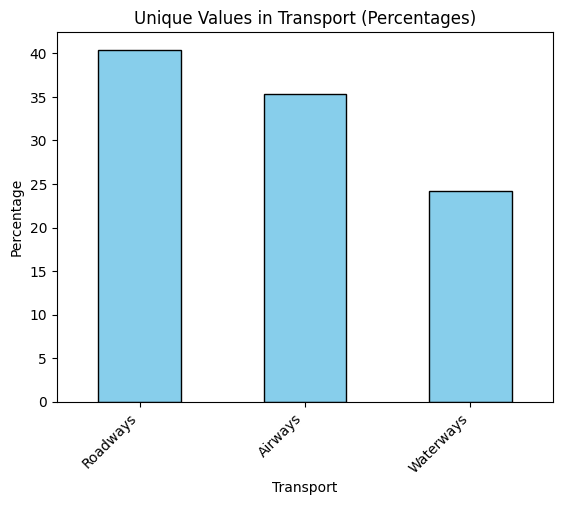

In [58]:
def plot_categorical_unique_values(df, column_label):
    """
    Plot unique values in a specific categorical column along with their percentages.

    Parameters:
    - df: pandas DataFrame
    - column_label: Label of the categorical column to plot
    """
    # Check if the specified column exists in the DataFrame
    if column_label not in df.columns:
        print(f"Column '{column_label}' not found in the DataFrame.")
        return

    # Plot unique values for the specified categorical column
    value_counts = df[column_label].value_counts(normalize=True) * 100  # Calculate percentages
    value_counts.plot(kind='bar', color='skyblue', edgecolor='black')
    
    # Set plot labels and title
    plt.title(f'Unique Values in {column_label} (Percentages)')
    plt.xlabel(column_label)
    plt.ylabel('Percentage')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()
    
    
plot_categorical_unique_values(df=df, column_label="Transport")

In [59]:
df["Transport"].unique()

array(['Airways', 'Roadways', nan, 'Waterways'], dtype=object)

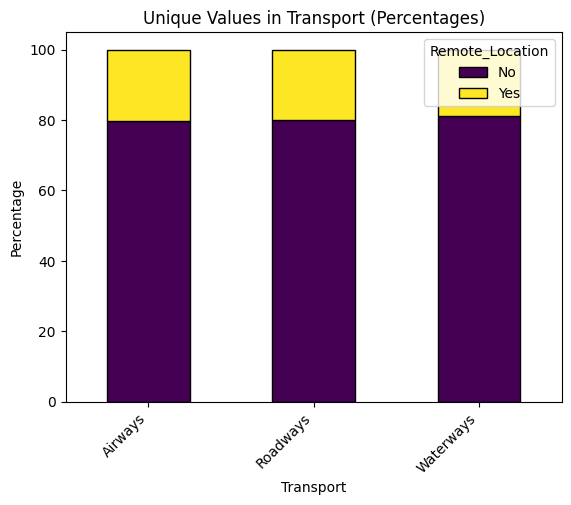

In [60]:
def plot_categorical_unique_values(df, column_label, hue_column=None):
    """
    Plot unique values in a specific categorical column along with their percentages.

    Parameters:
    - df: pandas DataFrame
    - column_label: Label of the categorical column to plot
    - hue_column: Optional, label of a second categorical column for coloring the bars
    """
    # Check if the specified column exists in the DataFrame
    if column_label not in df.columns:
        print(f"Column '{column_label}' not found in the DataFrame.")
        return

    # Check if the hue column exists
    if hue_column and hue_column not in df.columns:
        print(f"Hue column '{hue_column}' not found in the DataFrame.")
        return

    # Plot unique values for the specified categorical column with or without hue
    if hue_column:
        g = df.groupby([column_label, hue_column]).size().unstack()
        g = g.div(g.sum(axis=1), axis=0) * 100  # Convert to percentages
        g.plot(kind='bar', stacked=True, colormap='viridis', edgecolor='black')
    else:
        value_counts = df[column_label].value_counts(normalize=True) * 100  # Calculate percentages
        value_counts.plot(kind='bar', color='skyblue', edgecolor='black')

    # Set plot labels and title
    plt.title(f'Unique Values in {column_label} (Percentages)')
    plt.xlabel(column_label)
    plt.ylabel('Percentage')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()


plot_categorical_unique_values(df, column_label="Transport", hue_column="Remote_Location")

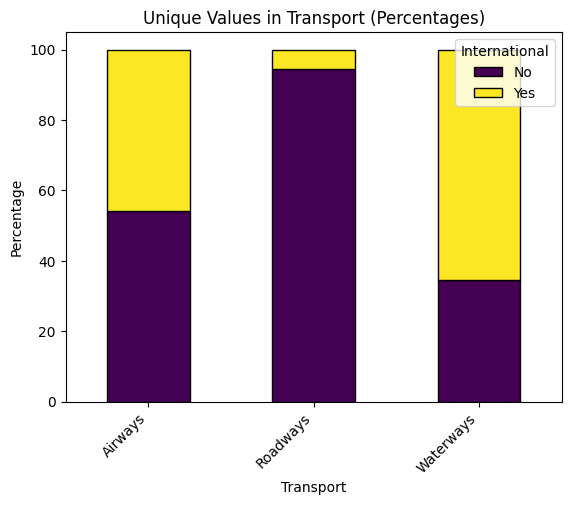

In [61]:
plot_categorical_unique_values(df, column_label="Transport", hue_column="International")

Shipping which are Domestic are majorly fullfilled by Roadways

Filling NA values in Transport column with Domestic Shipping as Roadways

In [62]:
def fill_transport_for_international_no(df, fill_value='Roadways'):
    """
    Fill NaN values in the "Transport" column with a specified value where "International" is "No".

    Parameters:
    - df: pandas DataFrame
    - fill_value: Value to fill in the "Transport" column (default is 'Roadways')

    Returns:
    - modified_df: DataFrame with NaN values filled in the "Transport" column
    """
    # Make a copy of the original DataFrame to avoid modifying it directly
    modified_df = df.copy()

    # Calculate the count of NaN values in "Transport" before the operation
    before_count = modified_df['Transport'].isna().sum()

    # Use boolean indexing to identify rows where "International" is "No" and "Transport" is NaN
    mask = (modified_df['International'] == 'No') & modified_df['Transport'].isna()

    # Fill NaN values in "Transport" with the specified value
    modified_df.loc[mask, 'Transport'] = fill_value

    # Calculate the count of NaN values in "Transport" after the operation
    after_count = modified_df['Transport'].isna().sum()

    # Print the count of NaN values before and after the operation
    print(f"NaN Count in 'Transport' before: {before_count}")
    print(f"NaN Count in 'Transport' after: {after_count}")

    return modified_df



df=fill_transport_for_international_no(df=df)

NaN Count in 'Transport' before: 1138
NaN Count in 'Transport' after: 357


##### Remote Location

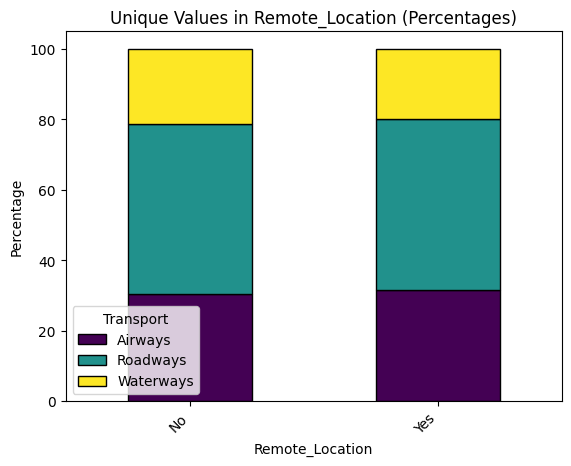

In [63]:
plot_categorical_unique_values(df, column_label="Remote_Location", hue_column="Transport")

##### Artist Reputation

In [64]:
df[["Artist_Reputation"]]

,Artist_Reputation
0,0.26
1,0.28
2,0.07
3,0.12
4,0.15
...,...
6494,0.45
6495,0.37
6497,0.68
6498,0.02


In [65]:
df.columns

Index(['Customer_Id', 'Artist_Name', 'Artist_Reputation', 'Height', 'Width',
       'Weight', 'Material', 'Price_Of_Sculpture', 'Base_Shipping_Price',
       'International', 'Express_Shipment', 'Installation_Included',
       'Transport', 'Fragile', 'Customer_Information', 'Remote_Location',
       'Scheduled_Date', 'Delivery_Date', 'Customer_Location', 'Cost'],
      dtype='object')

#### KNN Imputation

In [66]:
from sklearn.impute import KNNImputer

In [67]:
def fill_artist_reputation_with_knn(df, imputation_columns=['Artist_Reputation', 'Price_Of_Sculpture'], n_neighbors=3):
    """
    Fill NaN values in the 'Artist Reputation' column using k-nearest neighbors based on the 'Price of Product' column.

    Parameters:
    - df: pandas DataFrame
    - imputation_columns: List of columns for imputation (default is ['Artist Reputation', 'Price of Product'])
    - n_neighbors: Number of neighbors to consider for imputation (default is 2)

    Returns:
    - df_imputed: DataFrame with NaN values in 'Artist Reputation' column filled using k-nearest neighbors
    """
    # Create a copy of the DataFrame to avoid modifying it directly
    df_imputed = df.copy()

    # Initialize the KNN imputer
    knn_imputer = KNNImputer(n_neighbors=n_neighbors)

    # Perform imputation
    df_imputed[imputation_columns] = knn_imputer.fit_transform(df[imputation_columns])

    return df_imputed

df_imputed=fill_artist_reputation_with_knn(df=df)



In [68]:
df_1=df.copy()

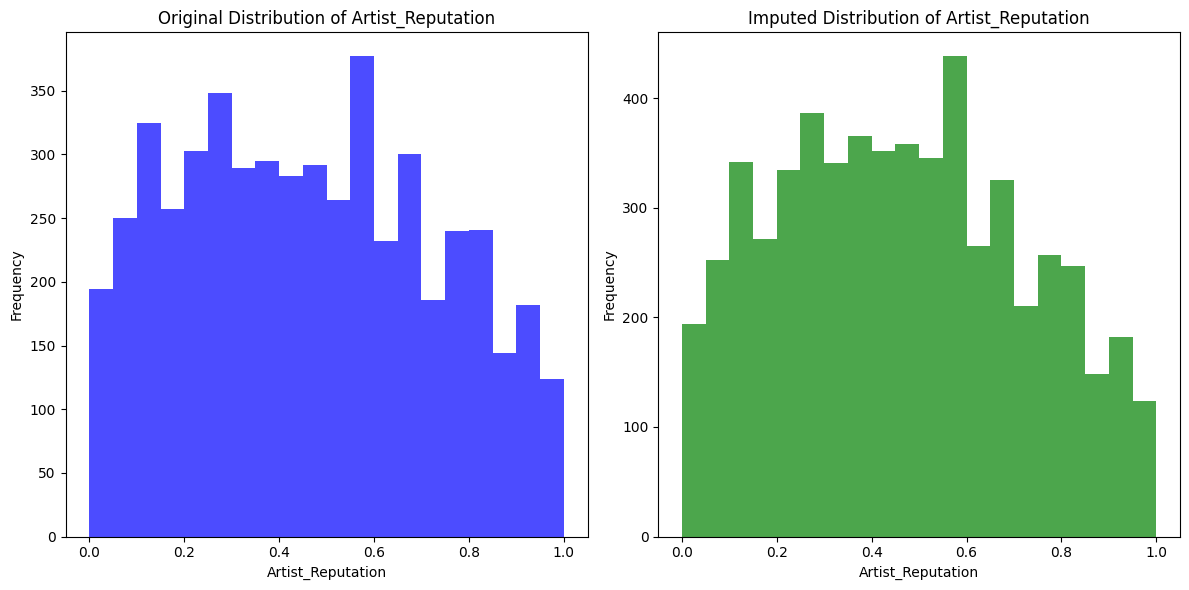

In [69]:
def plot_imputation(df_original=df_1, df_imputed=df_imputed, column_to_plot='Artist_Reputation'):
    """
    Plot the distribution of a specific column before and after imputation.

    Parameters:
    - df_original: Original DataFrame with NaN values
    - df_imputed: DataFrame with NaN values filled using imputation
    - column_to_plot: Name of the column to plot (default is 'Artist Reputation')
    """
    plt.figure(figsize=(12, 6))

    # Plot the original distribution
    plt.subplot(1, 2, 1)
    plt.hist(df_original[column_to_plot].dropna(), bins=20, color='blue', alpha=0.7)
    plt.title(f'Original Distribution of {column_to_plot}')
    plt.xlabel(column_to_plot)
    plt.ylabel('Frequency')

    # Plot the imputed distribution
    plt.subplot(1, 2, 2)
    plt.hist(df_imputed[column_to_plot], bins=20, color='green', alpha=0.7)
    plt.title(f'Imputed Distribution of {column_to_plot}')
    plt.xlabel(column_to_plot)
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()
    
    
plot_imputation()

In [74]:
df = df_imputed.copy()

#### Material

In [76]:
df["Material"].unique()

array(['Brass', 'Clay', 'Aluminium', 'Wood', 'Marble', 'Bronze', 'Stone'],
      dtype=object)

In [82]:
def knn_impute_weight_column(df, material_column='Material', weight_column='Weight', k_neighbors=5):
    """
    KNN impute the missing values in the 'Weight' column based on the 'Material' column.

    Parameters:
    - df: pandas DataFrame
    - material_column: Name of the material column (default is 'Material')
    - weight_column: Name of the weight column to be imputed (default is 'Weight')
    - k_neighbors: Number of neighbors to consider for imputation (default is 2)

    Returns:
    - df_imputed: DataFrame with the 'Weight' column imputed
    """
    # Make a copy of the DataFrame to avoid modifying it directly
    df_imputed = df.copy()

    # One-hot encode the 'Material' column
    df_imputed = pd.get_dummies(df_imputed, columns=[material_column], drop_first=True)

    # Columns for imputation (excluding 'Weight' and one-hot encoded 'Material' columns)
    imputation_columns = df_imputed.columns.difference([weight_column])

    # Initialize the KNN imputer
    knn_imputer = KNNImputer(n_neighbors=k_neighbors)

    # Perform imputation
    df_imputed[imputation_columns] = knn_imputer.fit_transform(df_imputed[imputation_columns])

    return df_imputed


knn_impute_weight_column(df=df, material_column='Material', weight_column='Weight', k_neighbors=5)

ValueError: could not convert string to float: 'Billy Jenkins'

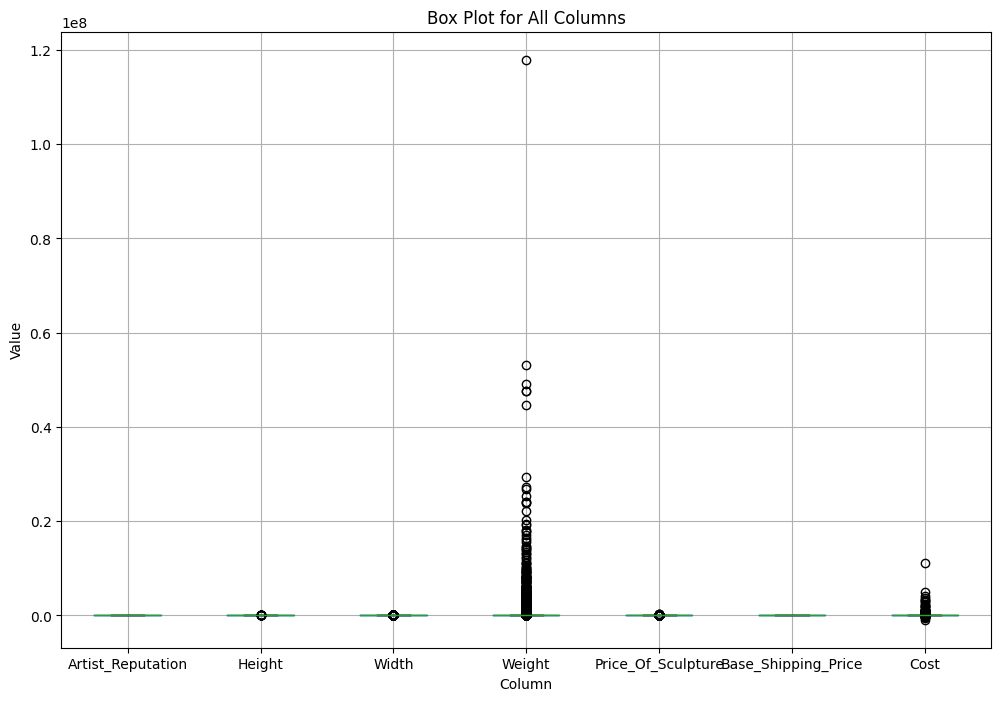

In [44]:
def box_plot_all_columns(df):
    """
    Generate a box plot for all columns in a DataFrame.

    Parameters:
    - df: pandas DataFrame
    """
    # Generate a box plot for all columns
    plt.figure(figsize=(12, 8))
    df.boxplot(rot=0)

    # Set plot labels and title
    plt.title('Box Plot for All Columns')
    plt.xlabel('Column')
    plt.ylabel('Value')
    plt.show()

box_plot_all_columns(df=df)

In [45]:
def remove_outliers_quantile_all_columns(df, lower_quantile=0.25, upper_quantile=0.75):
    """
    Remove outliers in all columns of a DataFrame using quantiles.

    Parameters:
    - df: pandas DataFrame
    - lower_quantile: Lower quantile threshold (default is 0.25)
    - upper_quantile: Upper quantile threshold (default is 0.75)

    Returns:
    - modified_df: DataFrame with outliers removed
    """
    # Make a copy of the original DataFrame to avoid modifying it directly
    modified_df = df.copy()

    # Create a dictionary to store the count of outliers removed for each column
    outliers_removed_counts = {}

    # Iterate through each column
    for column in modified_df.columns:
        # Calculate lower and upper quantiles for the column
        lower_bound = modified_df[column].quantile(lower_quantile)
        upper_bound = modified_df[column].quantile(upper_quantile)

        # Identify and count outliers using quantile-based range for the column
        outliers = modified_df[(modified_df[column] < lower_bound) | (modified_df[column] > upper_bound)]
        outliers_removed_count = len(outliers)

        # Print the count of outliers removed for the column
        print(f"Outliers removed from '{column}': {outliers_removed_count}")

        # Remove outliers from the modified DataFrame
        modified_df = modified_df[(modified_df[column] >= lower_bound) & (modified_df[column] <= upper_bound)]

        # Store the count of outliers removed for the column in the dictionary
        outliers_removed_counts[column] = outliers_removed_count

    return modified_df, outliers_removed_counts



remove_outliers_quantile_all_columns(df=df)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

#### Train Test Split

In [17]:
# Exclude the 'Target' column from the features (X)
X = df.drop('Cost', axis=1)
y=df["Cost"]


# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
X_train.head()

,Customer_Id,Artist_Name,Artist_Reputation,Height,Width,Weight,Material,Price_Of_Sculpture,Base_Shipping_Price,International,Express_Shipment,Installation_Included,Transport,Fragile,Customer_Information,Remote_Location,Scheduled_Date,Delivery_Date,Customer_Location
889,fffe3700370036003700,Robert Fehrenbach,0.00,4.0,4.0,51.0,Clay,4.70,19.42,No,No,Yes,Airways,Yes,Working Class,No,06/01/17,06/03/17,"Port Matthewberg, AL 60234"
4385,fffe3700330039003400,Matthew Minick,0.62,31.0,7.0,2729.0,Clay,9.20,19.05,No,No,No,Roadways,Yes,Working Class,No,04/27/16,04/27/16,"Nicolefort, NC 23101"
4919,fffe3700390037003300,Juan Saylor,0.37,18.0,9.0,233674.0,Stone,1011.11,90.95,No,Yes,No,Roadways,No,Wealthy,No,10/12/15,10/08/15,"Lake Toddstad, AR 03269"
4794,fffe3200300036003300,Michael Howe,0.49,7.0,NaN,5046.0,Stone,10.31,70.65,No,Yes,Yes,NaN,No,Wealthy,NaN,01/24/19,01/27/19,"New Jon, ID 20621"
5438,fffe3400310031003500,Emily Bank,0.40,26.0,10.0,15590.0,Brass,22.03,57.78,No,No,No,Airways,No,Working Class,No,07/16/18,07/16/18,"Bryantbury, WY 06158"


# Stastiscial analysis 

Splitting Numerical and catgeorical columns

In [25]:
X_train.shape

(5200, 19)

In [20]:
def split_numerical_categorical_labels(df):
    """
    Identify and return labels of numerical and categorical columns in a DataFrame.

    Parameters:
    - df: pandas DataFrame

    Returns:
    - numerical_labels: List of labels for numerical columns
    - categorical_labels: List of labels for categorical columns
    """
    # Identify numerical columns
    numerical_labels = list(df.select_dtypes(include=['number']).columns)

    # Identify categorical columns
    categorical_labels = list(df.select_dtypes(include=['object', 'category']).columns)

    return numerical_labels, categorical_labels


numerical_labels, categorical_labels = split_numerical_categorical_labels(df=X_train)

In [21]:
numerical_labels

['Artist_Reputation',
 'Height',
 'Width',
 'Weight',
 'Price_Of_Sculpture',
 'Base_Shipping_Price']

In [24]:
X_train[numerical_labels]

,Artist_Reputation,Height,Width,Weight,Price_Of_Sculpture,Base_Shipping_Price
889,0.00,4.0,4.0,51.0,4.70,19.42
4385,0.62,31.0,7.0,2729.0,9.20,19.05
4919,0.37,18.0,9.0,233674.0,1011.11,90.95
4794,0.49,7.0,NaN,5046.0,10.31,70.65
5438,0.40,26.0,10.0,15590.0,22.03,57.78
...,...,...,...,...,...,...
3772,0.16,9.0,5.0,84.0,5.36,22.25
5191,0.06,5.0,4.0,22.0,6.63,17.88
5226,0.12,22.0,10.0,23991.0,16.36,68.25
5390,0.19,NaN,7.0,126928.0,87.62,26.96


In [22]:
categorical_labels

['Customer_Id',
 'Artist_Name',
 'Material',
 'International',
 'Express_Shipment',
 'Installation_Included',
 'Transport',
 'Fragile',
 'Customer_Information',
 'Remote_Location',
 'Scheduled_Date',
 'Delivery_Date',
 'Customer_Location']

In [26]:
X_train[categorical_labels]

,Customer_Id,Artist_Name,Material,International,Express_Shipment,Installation_Included,Transport,Fragile,Customer_Information,Remote_Location,Scheduled_Date,Delivery_Date,Customer_Location
889,fffe3700370036003700,Robert Fehrenbach,Clay,No,No,Yes,Airways,Yes,Working Class,No,06/01/17,06/03/17,"Port Matthewberg, AL 60234"
4385,fffe3700330039003400,Matthew Minick,Clay,No,No,No,Roadways,Yes,Working Class,No,04/27/16,04/27/16,"Nicolefort, NC 23101"
4919,fffe3700390037003300,Juan Saylor,Stone,No,Yes,No,Roadways,No,Wealthy,No,10/12/15,10/08/15,"Lake Toddstad, AR 03269"
4794,fffe3200300036003300,Michael Howe,Stone,No,Yes,Yes,NaN,No,Wealthy,NaN,01/24/19,01/27/19,"New Jon, ID 20621"
5438,fffe3400310031003500,Emily Bank,Brass,No,No,No,Airways,No,Working Class,No,07/16/18,07/16/18,"Bryantbury, WY 06158"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,fffe3100390031003500,Carolyn Foster,NaN,No,No,No,Airways,No,Working Class,Yes,01/15/15,01/13/15,"New David, VA 79126"
5191,fffe3700340036003700,Glenn Ruffin,Wood,No,No,Yes,Roadways,No,Working Class,No,09/06/18,09/02/18,"Port Kyleland, MA 98248"
5226,fffe3200300032003900,Janet Lima,Brass,No,No,No,Roadways,No,Working Class,No,11/20/16,11/17/16,"Brownville, ID 12970"
5390,fffe3400320038003100,Linda Pugh,Stone,No,No,No,Waterways,No,Working Class,No,02/15/17,02/13/17,"Lake Matthew, AR 77876"


### Numerical

#### Discrete 

In [28]:
def separate_discrete_continuous_data(df):
    """
    Separate a DataFrame into two DataFrames: one with discrete variables and one with continuous variables.

    Parameters:
    - df: pandas DataFrame

    Returns:
    - discrete_data: DataFrame with discrete variable columns
    - continuous_data: DataFrame with continuous variable columns
    """
    # Separate columns based on data types
    discrete_data = df.select_dtypes(include=['object', 'category'])
    continuous_data = df.select_dtypes(include=['number'])

    return discrete_data, continuous_data


discrete_data, continuous_data=separate_discrete_continuous_data(df=X_train[numerical_labels])

#### Continuous 

In [30]:
continuous_data

,Artist_Reputation,Height,Width,Weight,Price_Of_Sculpture,Base_Shipping_Price
889,0.00,4.0,4.0,51.0,4.70,19.42
4385,0.62,31.0,7.0,2729.0,9.20,19.05
4919,0.37,18.0,9.0,233674.0,1011.11,90.95
4794,0.49,7.0,NaN,5046.0,10.31,70.65
5438,0.40,26.0,10.0,15590.0,22.03,57.78
...,...,...,...,...,...,...
3772,0.16,9.0,5.0,84.0,5.36,22.25
5191,0.06,5.0,4.0,22.0,6.63,17.88
5226,0.12,22.0,10.0,23991.0,16.36,68.25
5390,0.19,NaN,7.0,126928.0,87.62,26.96


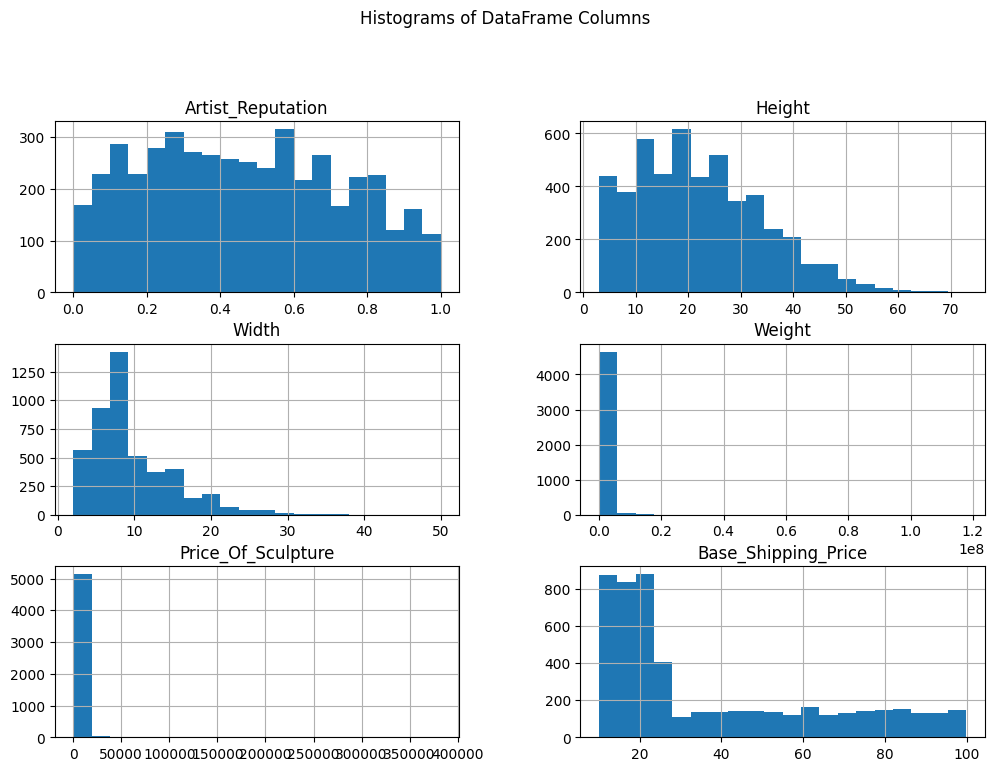

In [32]:
def plot_histograms(df):
    """
    Plot histograms for each column in a DataFrame.

    Parameters:
    - df: pandas DataFrame
    """
    # Use the hist method to plot histograms for all columns
    df.hist(figsize=(12, 8), bins=20)
    
    # Set plot labels and title
    plt.suptitle("Histograms of DataFrame Columns", y=1.02)
    plt.show()
    
    
plot_histograms(df=continuous_data)

### Categorical